In [156]:
API = "joqsp2fB8lGkkSOQQDK"

In [157]:
import pandas as pd
import numpy as np 
from pymatgen.ext.matproj import MPRester
import seaborn as sns

In [158]:
mpr = MPRester(API)
criteria = {"chemsys" : {"$in" : ['B-O','Al-O','Ga-O','In-O',"Tl-O","Nh-O","B-Al-O","B-Ga-O","B-In-O","B-Tl-O","B-Nh-O",
                                 "Al-Ga-O","Al-In-O","Al-Tl-O","Al-Nh-O","Ga-In-O","Ga-Tl-O","Ga-Nh-O","In-Tl-O","In-Nh-O"]}}
props = ["pretty_formula","density","formation_energy_per_atom","e_above_hull","band_gap","structure.lattice"]
entries = mpr.query(criteria ,  props)


C:\Users\DELL\miniconda3\envs\my_pymatgen\lib\site-packages\pymatgen\ext\matproj.py:179: UserWarning: You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.
  warnings.warn(


In [159]:
df = pd.DataFrame(entries)
df.head()

,pretty_formula,density,formation_energy_per_atom,e_above_hull,band_gap,structure.lattice
0,AlGaO3,4.815930,-2.829282,0.027667,3.2132,"{'matrix': [[5.001676, 0.0, 0.0], [0.0, 8.6014..."
1,AlGaO3,4.871107,-2.828189,0.028760,3.1117,"{'matrix': [[4.995092, 0.0, 0.0], [0.0, 8.6250..."
2,AlGaO3,5.268751,-2.749419,0.107530,2.6071,"{'matrix': [[4.889231, 0.0, 0.0], [0.0, 5.0095..."
3,Al11InO17,3.553205,-3.302315,0.013353,3.7251,"{'matrix': [[2.828073, -4.898367, 0.0], [2.828..."
4,AlInO3,6.148600,-2.253180,0.467778,0.0000,"{'matrix': [[3.714679, 0.0, 0.0], [0.0, 3.7146..."


In [160]:
df["a"] = df["structure.lattice"].apply(lambda x:x["a"])
df["b"] = df["structure.lattice"].apply(lambda x:x["b"])
df["c"] = df["structure.lattice"].apply(lambda x:x["c"])
df["alpha"] = df["structure.lattice"].apply(lambda x:x["alpha"])
df["beta"] = df["structure.lattice"].apply(lambda x:x["beta"])
df["gamma"] = df["structure.lattice"].apply(lambda x:x["gamma"])
df = df.drop("structure.lattice" ,  axis=1)
#df.drop("structure.lattice" , inplace=True, axis=1)
df.head()

,pretty_formula,density,formation_energy_per_atom,e_above_hull,band_gap,a,b,c,alpha,beta,gamma
0,AlGaO3,4.815930,-2.829282,0.027667,3.2132,5.001676,8.601477,9.277844,90.0,90.0,90.000000
1,AlGaO3,4.871107,-2.828189,0.028760,3.1117,4.995092,8.625028,9.159761,90.0,90.0,90.000000
2,AlGaO3,5.268751,-2.749419,0.107530,2.6071,4.889231,5.009529,7.448018,90.0,90.0,90.000000
3,Al11InO17,3.553205,-3.302315,0.013353,3.7251,5.656147,5.656147,23.061733,90.0,90.0,120.000009
4,AlInO3,6.148600,-2.253180,0.467778,0.0000,3.714679,3.714679,3.714679,90.0,90.0,90.000000


<AxesSubplot:xlabel='density', ylabel='Count'>

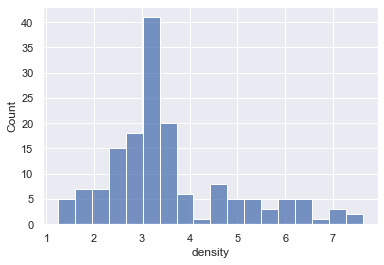

In [161]:
sns.histplot(df["density"])

<AxesSubplot:xlabel='a', ylabel='Count'>

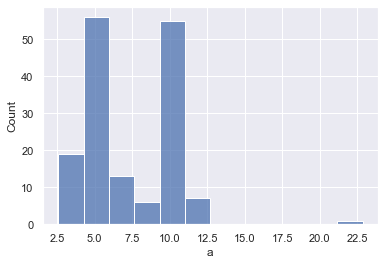

In [162]:
sns.histplot(df["a"])

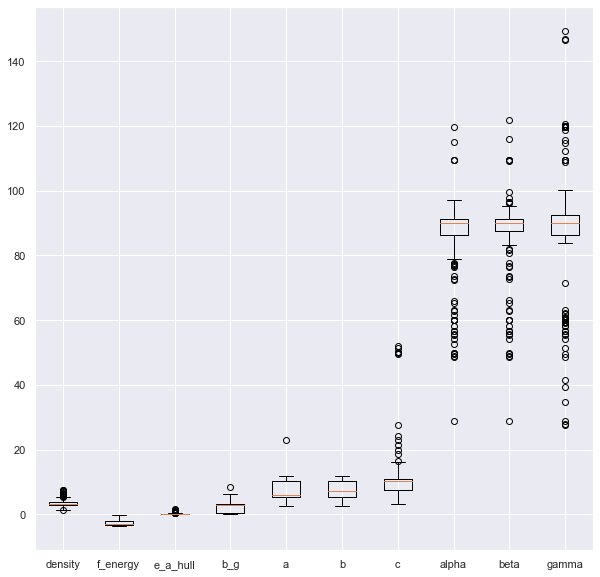

In [163]:
data =[df['density'],df['formation_energy_per_atom'],df['e_above_hull'],df['band_gap'],df['a'],df['b'],df['c'],df['alpha'],df['beta'],df['gamma']]
import matplotlib.pyplot as plt
%matplotlib inline
figure = plt.figure(figsize=(10,10))
plt.boxplot(data , labels=['density','f_energy','e_a_hull','b_g','a','b','c','alpha','beta','gamma'])
plt.show()

In [164]:
df.isnull().sum()

pretty_formula               0
density                      0
formation_energy_per_atom    0
e_above_hull                 0
band_gap                     0
a                            0
b                            0
c                            0
alpha                        0
beta                         0
gamma                        0
dtype: int64

In [165]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
((df<(q1 - 1.5*IQR)) | (df>(q3 + 1.5*IQR))).sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6668\964448171.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df<(q1 - 1.5*IQR)) | (df>(q3 + 1.5*IQR))).sum()


a                             1
alpha                        36
b                             0
band_gap                      1
beta                         39
c                            13
density                      21
e_above_hull                 22
formation_energy_per_atom     0
gamma                        61
pretty_formula                0
dtype: int64

In [166]:
from sklearn.preprocessing import MinMaxScaler
df1 = df
scaler = MinMaxScaler()
scaler.fit_transform(df1.iloc[:,1:].values)
df1.head()

,pretty_formula,density,formation_energy_per_atom,e_above_hull,band_gap,a,b,c,alpha,beta,gamma
0,AlGaO3,4.815930,-2.829282,0.027667,3.2132,5.001676,8.601477,9.277844,90.0,90.0,90.000000
1,AlGaO3,4.871107,-2.828189,0.028760,3.1117,4.995092,8.625028,9.159761,90.0,90.0,90.000000
2,AlGaO3,5.268751,-2.749419,0.107530,2.6071,4.889231,5.009529,7.448018,90.0,90.0,90.000000
3,Al11InO17,3.553205,-3.302315,0.013353,3.7251,5.656147,5.656147,23.061733,90.0,90.0,120.000009
4,AlInO3,6.148600,-2.253180,0.467778,0.0000,3.714679,3.714679,3.714679,90.0,90.0,90.000000


In [167]:
from sklearn.preprocessing import StandardScaler
df2 = df
scaler = StandardScaler()
scaler.fit_transform(df2.iloc[:,1:].values)
df2.head()

,pretty_formula,density,formation_energy_per_atom,e_above_hull,band_gap,a,b,c,alpha,beta,gamma
0,AlGaO3,4.815930,-2.829282,0.027667,3.2132,5.001676,8.601477,9.277844,90.0,90.0,90.000000
1,AlGaO3,4.871107,-2.828189,0.028760,3.1117,4.995092,8.625028,9.159761,90.0,90.0,90.000000
2,AlGaO3,5.268751,-2.749419,0.107530,2.6071,4.889231,5.009529,7.448018,90.0,90.0,90.000000
3,Al11InO17,3.553205,-3.302315,0.013353,3.7251,5.656147,5.656147,23.061733,90.0,90.0,120.000009
4,AlInO3,6.148600,-2.253180,0.467778,0.0000,3.714679,3.714679,3.714679,90.0,90.0,90.000000


In [168]:
df3 = df
datas =[['density'],['formation_energy_per_atom'],['e_above_hull'],['band_gap'],['a'],['b'],['c'],['alpha'],['beta'],['gamma']]
for i in datas:
    df3[i] = np.log(df3[i])
df3.head()

C:\Users\DELL\miniconda3\envs\my_pymatgen\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\DELL\miniconda3\envs\my_pymatgen\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\DELL\miniconda3\envs\my_pymatgen\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,pretty_formula,density,formation_energy_per_atom,e_above_hull,band_gap,a,b,c,alpha,beta,gamma
0,AlGaO3,1.571929,NaN,-3.587507,1.167267,1.609773,2.151934,2.227629,4.49981,4.49981,4.499810
1,AlGaO3,1.583321,NaN,-3.548779,1.135169,1.608456,2.154668,2.214820,4.49981,4.49981,4.499810
2,AlGaO3,1.661793,NaN,-2.229985,0.958238,1.587035,1.611342,2.007948,4.49981,4.49981,4.499810
3,Al11InO17,1.267850,NaN,-4.316051,1.315094,1.732743,1.732743,3.138175,4.49981,4.49981,4.787492
4,AlInO3,1.816224,NaN,-0.759762,-inf,1.312292,1.312292,1.312292,4.49981,4.49981,4.499810


In [176]:
df4 = df
datas =[['density'],['formation_energy_per_atom'],['e_above_hull'],['band_gap'],['a'],['b'],['c'],['alpha'],['beta'],['gamma']]
for i in datas:
    mean = df4[i].mean()
    std = df4[i].std()
    df4[i] = (df4[i] - mean) / std
df4.describe()

,density,formation_energy_per_atom,e_above_hull,band_gap,a,b,c,alpha,beta,gamma
count,1.570000e+02,0.0,0.0,0.0,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02
mean,-1.131437e-17,NaN,NaN,NaN,2.828594e-18,-1.697156e-17,1.131437e-17,3.394312e-17,-2.262875e-17,1.131437e-17
std,1.000000e+00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.692810e+00,NaN,NaN,NaN,-2.301335e+00,-2.716861e+00,-2.253181e+00,-5.508047e+00,-5.930337e+00,-3.819314e+00
25%,-3.221739e-01,NaN,NaN,NaN,-5.892081e-01,-7.217674e-01,-5.409122e-01,1.474902e-01,1.473385e-01,5.115845e-02
50%,-1.877230e-01,NaN,NaN,NaN,-2.679735e-01,4.269457e-03,9.032943e-02,3.632835e-01,2.934631e-01,1.922554e-01
75%,4.663475e-01,NaN,NaN,NaN,9.560721e-01,9.845906e-01,2.346328e-01,4.343176e-01,3.596257e-01,2.806023e-01
max,2.247819e+00,NaN,NaN,NaN,2.849670e+00,1.356840e+00,3.343558e+00,1.826766e+00,1.943884e+00,1.913393e+00


In [180]:
df5 = df
datas =['density','formation_energy_per_atom','e_above_hull','band_gap','a','b','c','alpha','beta','gamma']
for i in datas:
    df5[i] = (df5[i] - min(df5[i]))/(max(df5[i]) - min(df5[i]))
df5.head()

,pretty_formula,density,formation_energy_per_atom,e_above_hull,band_gap,a,b,c,alpha,beta,gamma
0,AlGaO3,0.746771,NaN,NaN,NaN,0.304484,0.792567,0.384486,0.800475,0.790402,0.699769
1,AlGaO3,0.753063,NaN,NaN,NaN,0.303881,0.794362,0.379906,0.800475,0.790402,0.699769
2,AlGaO3,0.796400,NaN,NaN,NaN,0.294077,0.437716,0.305940,0.800475,0.790402,0.699769
3,Al11InO17,0.578838,NaN,NaN,NaN,0.360766,0.517405,0.710046,0.800475,0.790402,0.870638
4,AlInO3,0.881687,NaN,NaN,NaN,0.168329,0.241415,0.057213,0.800475,0.790402,0.699769
